In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [4]:
sns.set_theme()

In [5]:
import os
import json

In [6]:
results_root = '/home/kwatchar3/bss_spatial_eval/results/rdelay'

ddfs = os.listdir(results_root)
print(ddfs)


dfs = []

for d in ddfs:
    if 'results-ok.csv' in os.listdir(os.path.join(results_root, d)):
        df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    else:
        continue
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
    print(args.get('estim_filter_kwargs'))
    if args['estim_filter_kwargs']:
        df['rdelay'] = args['estim_filter_kwargs']['rdelay'] + 1
    else:
        df['rdelay'] = 1
    dfs.append(df)

df = pd.concat(dfs)
# df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 

# df = df[df['cutoff'] <= 4000]

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

['20221206172659', '20221206172805', '20221206194648', '20221206173544', '20221206173211', '20221206172533', '20221206194345', '20221206195158', '20221206194029', '20221206194839', '20221206195654', '20221206195019', '20221206195431', '20221206173405', '20221206173956', '20221206174221', '20221206194137', '20221206173030', '20221206194509', '20221206172907', '20221206172552', '20221206173724', '20221206194243']
{'ldelay': 0, 'rdelay': 1, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 2, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 16, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 64, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 16, 'ftype': 'delay'}
None
{'ldelay': 0, 'rdelay': 4, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 128, 'ftype': 'delay'}
None
{'ldelay': 0, 'rdelay': 32, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 512, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 64, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 256, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 32, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay':

In [7]:
df

,Unnamed: 0,spr/num,sfr/num,cost,true_angle,est_angle,est_deviation,file,rdelay
0,0,7.159877,36.971004,0.014621,0.0,-45.0,-45.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,2
1,1,9.197135,34.646852,0.024959,0.0,-30.0,-30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,2
2,2,10.728104,31.177283,0.055455,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,2
3,3,11.075409,29.874207,0.074820,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,2
4,4,9.812337,28.872255,0.094184,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,2
...,...,...,...,...,...,...,...,...,...
443,443,7.194122,22.955401,0.417026,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,3
444,444,6.992759,21.639146,0.562651,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,3
445,445,6.207271,20.623959,0.708276,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,3
446,446,5.097962,19.848135,0.843976,0.0,30.0,30.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,3


In [16]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(df.rdelay.min(), df.rdelay.max()), cmap=palette), 
        ax=ax, label='Delay taps', 
        pad=0.01, aspect=30, 
        ticks=[1, 8, 64, 256, 512],
        format=lambda v, t: f"{v}" if v != 1 else "0"
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

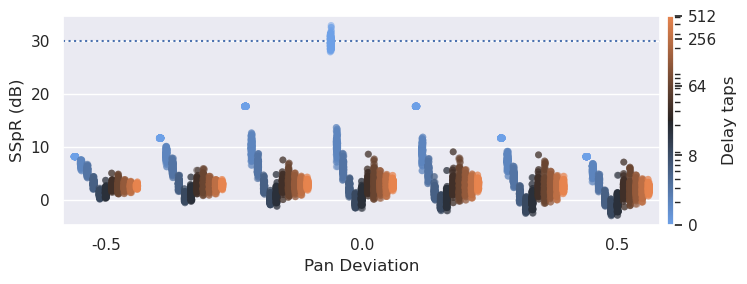

In [24]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(8, 3))
df['pan_deviation'] = df['est_deviation'].apply(lambda x: x/90) 
 
line = 30 #np.percentile(df['spr/numx'].values, 0.99)
    
df['spr/numx'] = df['spr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)
    
ax = sns.stripplot(df,  y='spr/numx', x='pan_deviation', hue='rdelay', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(df.rdelay.min(), df.rdelay.max()))
ax.set(ylabel='SSpR (dB)', xlabel='Pan Deviation', xticks=[0, 3, 6])
set_axes(fig, ax, line)

plt.tight_layout()
plt.savefig('rdelay-sspr.png', dpi=300)
plt.show()

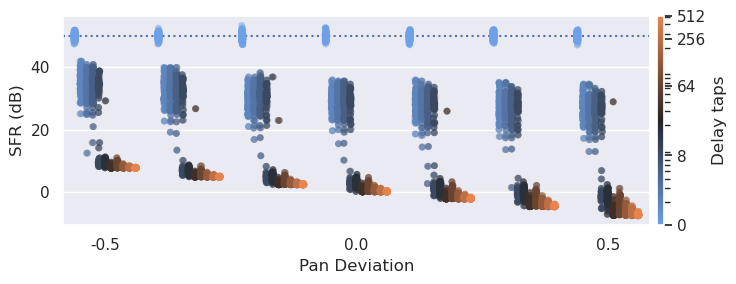

In [23]:
# ax = sns.scatterplot(df[~(df['filt'].str.contains('no'))], x='est_deviation_j', y='sfr/num', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(8, 3))

line = 50

df['sfr/numx'] = df['sfr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

ax = sns.stripplot(df,  y='sfr/numx', x='pan_deviation', hue='rdelay', palette=palette, ax=ax, alpha=0.5, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='SFR (dB)', xlabel='Pan Deviation', xticks=[0, 3, 6])
set_axes(fig, ax, line)

plt.tight_layout()
plt.savefig('rdelay-sfr.png', dpi=300)
plt.show()

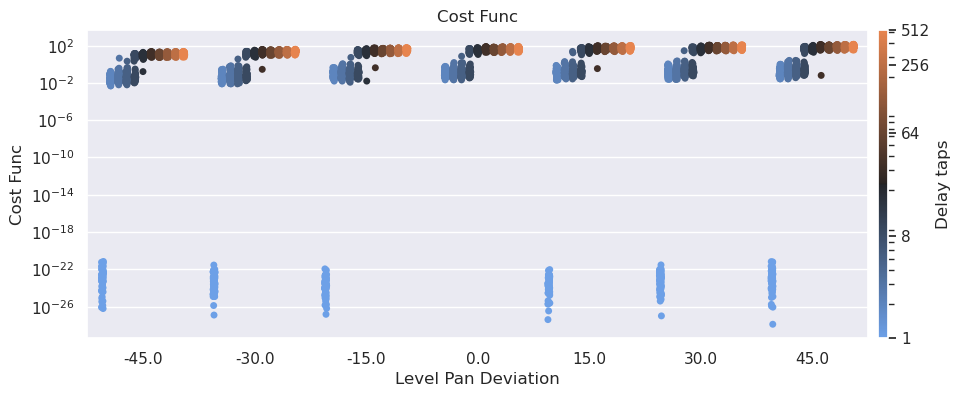

In [35]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='rdelay', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Level Pan Deviation', yscale='log')
set_axes(fig, ax, line=False)
plt.show()